# Saturation of hidden states 

To deal with hidden state saturation, the following were tried:

* Leave out any all zero inputs 

This did not seem to effect the hidden states very muchm, however, the MSE during test time of all zero inputs increased which is expected 

* Use gradient clipping with different clipping thresholds like 10, 5, 2, 0.5, 0.05, 0.005

As the gradient is clipped more stringently, the values do tend stay away from the extremes (1, -1) to some extent (not completely), however, zero states are still found to be very common. 

* Use layer norm 

Does not seem to effect the saturation much. Zero states are still persistent. 

* Use z-normed assays

Does not seem to effect the saturation. Zero states still persistent. 

* Replace tanh with softsign activation in the LSTM

Among all the methods, changing the activation seems to be the most effective at reducing the number of zero states and an MAP of 0.85 was noticed for a particular cell type, however, the zero states are not completely handled yet.


As of now, the model of choice is: gradient clipped at 0.05 with softsign activation and layer norm, and z-normed assays as input by leaving out the all zero inputs at any time step.

After some more experimentation, it was observed that the gradient needs to be clipped aggresively to make the hidden states stay away from the extremes. 

* We noticed that when the gradient is clipped all the way to **5e-13 - 5e-14**, the MAP improves considerably. 

# Experiment with number of hidden states 

We trained the model with the hidden states given below and noted the MAP of one task for one cell type. 

hidden_states = [6, 12, 24, 36, 48, 60, 96, 110]

After gradient clipping, a steady increase in the MAP is observed with hidden states. Average MAP considering all the cell types is due. 

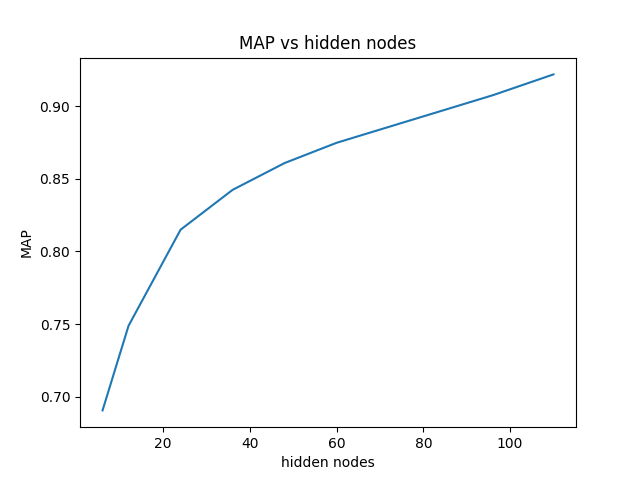

# Xgboost 

As the Avocado specifications of Xgboost was consuming prohibitive memory, the number of estimators were changed to a very small value like 10 and the maximum depth of the tree was reduced to 4. 

This would reduce the expressive power and therefore the MAP out of Xgboost, but nonetheless, as our goal is comparison between the two schemes, it shouldn't be a major concern for us. 